In [14]:
import numpy as np
import seaborn as sns
import pandas as pd
from pandas import read_csv
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df=pd.read_csv('AAPL.csv')

In [15]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-19,15.362500,15.406071,15.232500,15.276786,13.022205,261738400
1,2012-01-20,15.267500,15.267857,14.991071,15.010714,12.795402,413974400
2,2012-01-23,15.095357,15.301786,15.082143,15.264643,13.011852,306062400
3,2012-01-24,15.182143,15.182143,14.983929,15.014643,12.798751,547638000
4,2012-01-25,16.230000,16.230356,15.847500,15.952143,13.597890,958314000


In [9]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2743,2022-12-12,142.699997,144.500000,141.059998,144.490005,144.490005,70462700
2744,2022-12-13,149.500000,149.970001,144.240005,145.470001,145.470001,93886200
2745,2022-12-14,145.350006,146.660004,141.160004,143.210007,143.210007,82291200
2746,2022-12-15,141.110001,141.800003,136.029999,136.500000,136.500000,98931900
2747,2022-12-16,136.690002,137.649994,133.729996,134.509995,134.509995,160080100


In [11]:
# SHOWS THE LATEST STOCK UPDATES

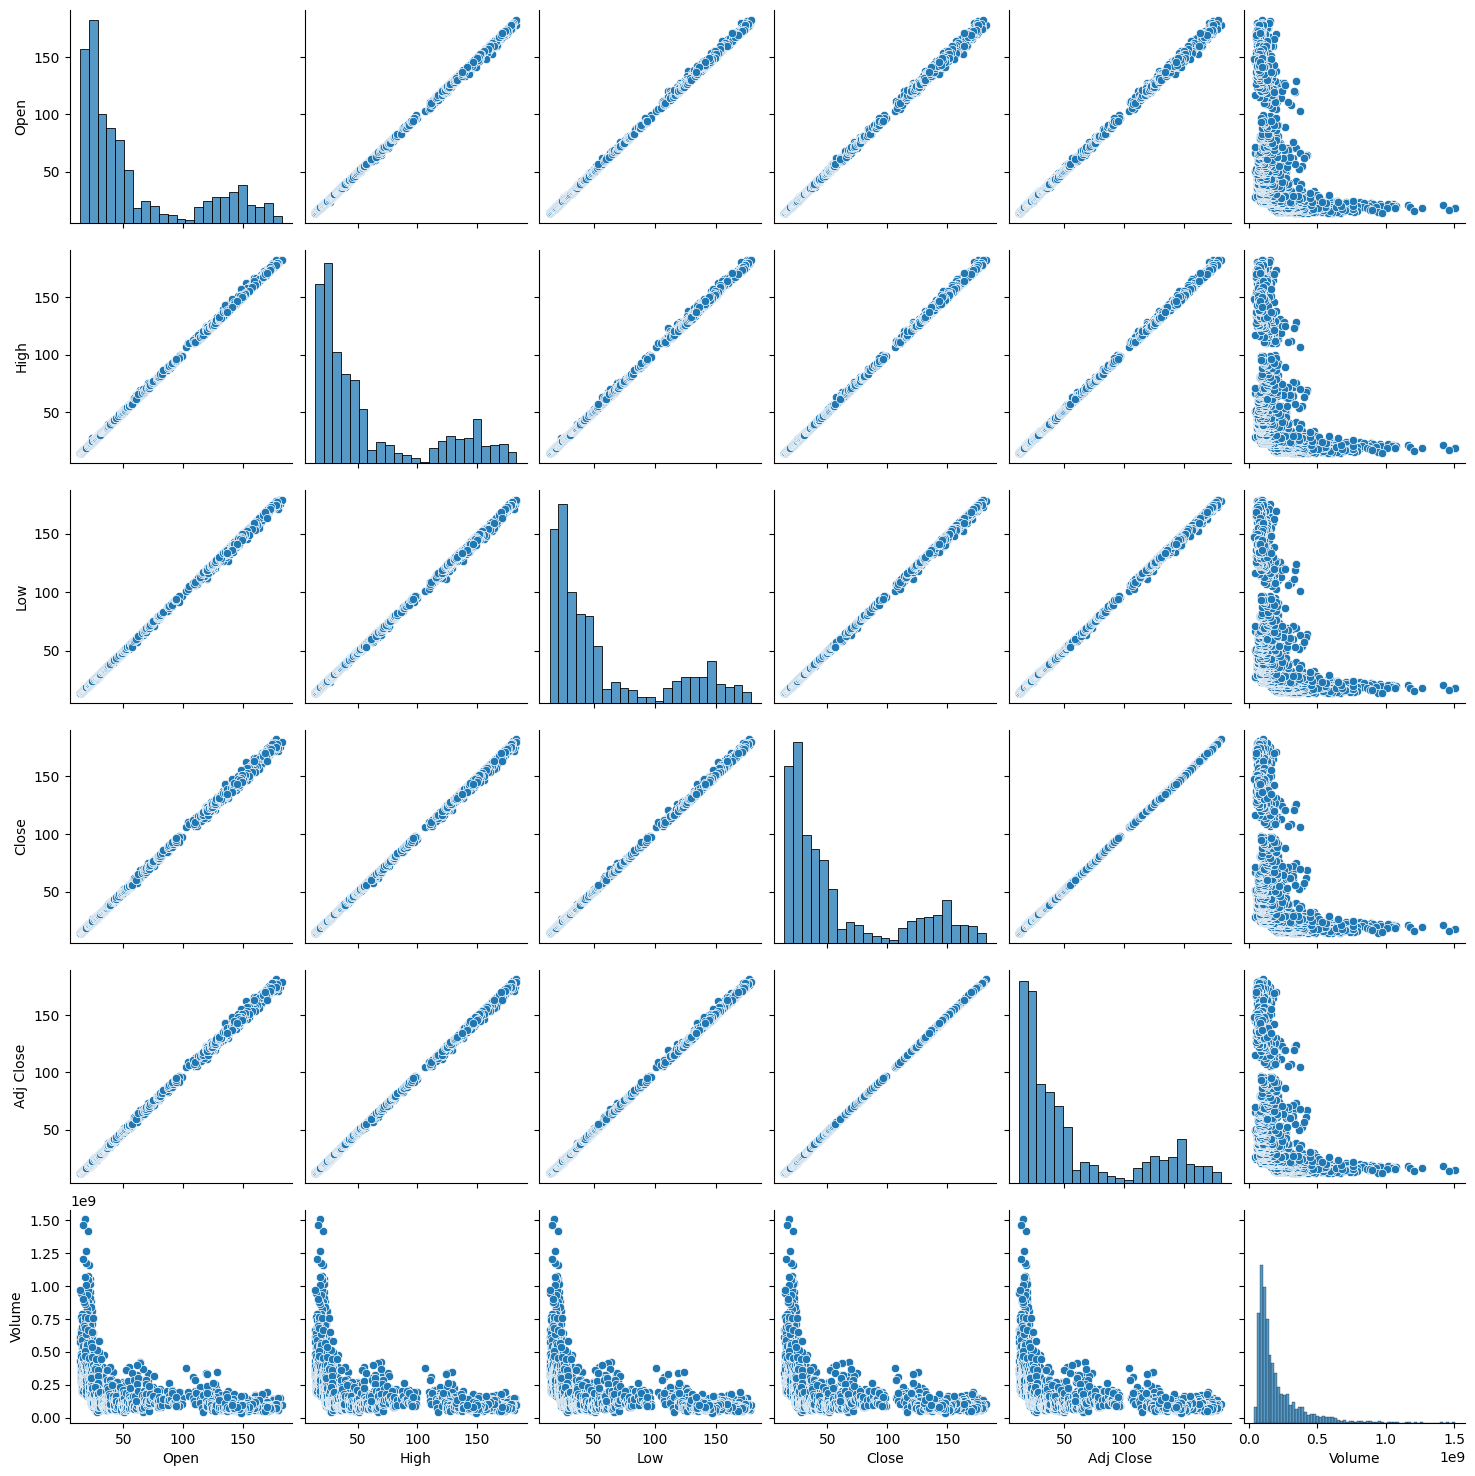

In [12]:
sns.pairplot(data=df)

In [16]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2748.000000,2748.000000,2748.000000,2748.000000,2748.000000,2.748000e+03
mean,58.545416,59.202590,57.901340,58.574675,56.680575,2.036987e+08
std,47.871979,48.499077,47.259878,47.902186,48.480504,1.721623e+08
min,13.856071,14.271429,13.753571,13.947500,12.064590,3.519590e+07
25%,24.210625,24.426875,23.974286,24.212501,22.043581,9.512950e+07
50%,37.678751,38.221250,37.356251,37.685000,35.919493,1.393950e+08
75%,76.088123,77.482502,75.508125,76.986874,75.684063,2.479473e+08
max,182.630005,182.940002,179.119995,182.009995,180.959747,1.506120e+09


In [17]:
# Shows the high/low and also std, mean of the dataaset

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748 entries, 0 to 2747
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2748 non-null   object 
 1   Open       2748 non-null   float64
 2   High       2748 non-null   float64
 3   Low        2748 non-null   float64
 4   Close      2748 non-null   float64
 5   Adj Close  2748 non-null   float64
 6   Volume     2748 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 150.4+ KB


In [19]:
df = df.drop(['Date'],axis=1)
df = df.drop(['Adj Close'],axis=1)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748 entries, 0 to 2747
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2748 non-null   float64
 1   High    2748 non-null   float64
 2   Low     2748 non-null   float64
 3   Close   2748 non-null   float64
 4   Volume  2748 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 107.5 KB


In [25]:
# Dropped the 2 columns 'Date' and 'Adj Close' due to date being an object and adj close due to the fact we will be using the 
# 'Close' as the variable therefore both of those columns aren't needed

In [28]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [29]:
df.tail(5)

,Open,High,Low,Close,Volume
2743,142.699997,144.500000,141.059998,144.490005,70462700
2744,149.500000,149.970001,144.240005,145.470001,93886200
2745,145.350006,146.660004,141.160004,143.210007,82291200
2746,141.110001,141.800003,136.029999,136.500000,98931900
2747,136.690002,137.649994,133.729996,134.509995,160080100


In [30]:
# Shows the latest price open/closes

In [31]:
X = df[['Open', 'High', 'Low','Volume']]
y = df['Close']

In [32]:
X

,Open,High,Low,Volume
0,15.362500,15.406071,15.232500,261738400
1,15.267500,15.267857,14.991071,413974400
2,15.095357,15.301786,15.082143,306062400
3,15.182143,15.182143,14.983929,547638000
4,16.230000,16.230356,15.847500,958314000
...,...,...,...,...
2743,142.699997,144.500000,141.059998,70462700
2744,149.500000,149.970001,144.240005,93886200
2745,145.350006,146.660004,141.160004,82291200
2746,141.110001,141.800003,136.029999,98931900


In [34]:
y

0        15.276786
1        15.010714
2        15.264643
3        15.014643
4        15.952143
           ...    
2743    144.490005
2744    145.470001
2745    143.210007
2746    136.500000
2747    134.509995
Name: Close, Length: 2748, dtype: float64

In [35]:
# Using scikit-learn - we produced the x and y axis and now preparing for training and testing 

In [36]:
x_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.1, random_state=1)

In [37]:
lrmodel = LinearRegression()
lrmodel.fit(x_train,y_train)

LinearRegression()

In [38]:
# Trained for LinearRegression

In [39]:
print ('Coefficients = ', lrmodel.coef_)

Coefficients =  [-6.83171668e-01  8.94233771e-01  7.87899255e-01 -3.93296506e-11]


In [40]:
# Shows the 'Coefficients' of the model which shows whether their is positive or negative correlation

In [41]:
pred = lrmodel.predict(x_test)

Text(0, 0.5, 'Predicted')

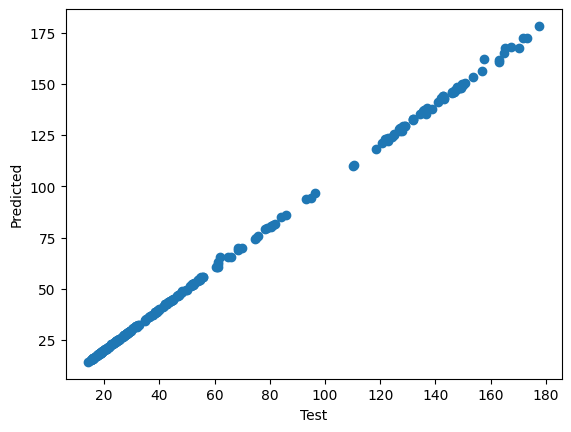

In [42]:
plt.scatter (y_test,pred)
plt.xlabel ('Test')
plt.ylabel ('Predicted')

In [45]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error: 0.298168457624399
Mean Squared Error: 0.34524582498321477
Root Mean Squared Error: 0.587576229082844


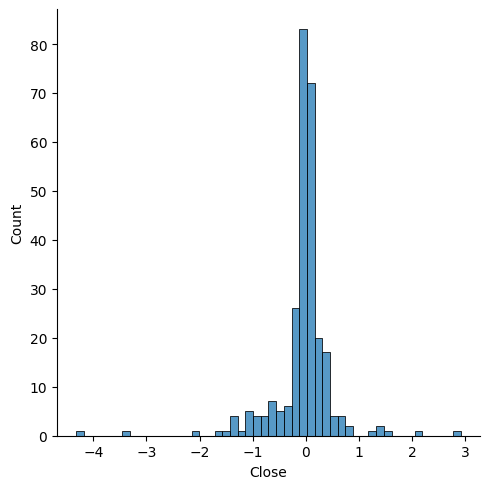

In [50]:
sns.displot((y_test-pred),bins=50);

In [56]:
# end

In [ ]:
# end